<a href="https://colab.research.google.com/github/abia200304/IIIT-Hyderabad-Research_works/blob/main/SAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip -o /content/archive.zip


Archive:  /content/archive.zip
  inflating: Traffic.csv             
  inflating: TrafficTwoMonth.csv     


In [ ]:
from glob import glob
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from sklearn.model_selection import  train_test_split

import matplotlib.pyplot as plt
import tensorflow as tf

file_path='/content/TrafficTwoMonth.csv'
df=pd.read_csv(file_path)
display(df)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal
...,...,...,...,...,...,...,...,...,...
5947,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
5948,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
5949,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
5950,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [ ]:
cols=list(df.columns)

In [ ]:

print(cols)

['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total', 'Traffic Situation']


In [ ]:
column_3_data = df.iloc[:, 3]
column_4_data = df.iloc[:, 4]
column_5_data = df.iloc[:, 5]
column_6_data = df.iloc[:, 6]

In [ ]:
coloumn_3_data=np.array(column_3_data)
coloumn_4_data=np.array(column_4_data)
coloumn_5_data=np.array(column_5_data)
coloumn_6_data=np.array(column_6_data)

In [ ]:
column3_data=coloumn_3_data.reshape(-1,1)
column4_data =coloumn_4_data.reshape(-1,1)
column5_data=coloumn_5_data.reshape(-1,1)
column6_data=coloumn_6_data.reshape(-1,1)

In [ ]:
data = np.concatenate([ column3_data,column4_data,column5_data,column6_data],axis =1)

In [ ]:

scalar=MinMaxScaler((0,1))
scaled_data=scalar.fit_transform(data)

In [ ]:
def create_dataset(dataset, time_step):
    X, Y = [], []
    for i in range(len(dataset)-time_step):
        a = dataset[i:(i+time_step), :]
        X.append(a)
        Y.append(dataset[i + time_step, :])
    return np.array(X), np.array(Y)
time_step = 15
X, Y= create_dataset(scaled_data, time_step)
print(X.shape)
print(Y.shape)

(5937, 15, 4)
(5937, 4)


In [ ]:
X_train=X[:int(0.8*len(X))]
y_train = Y[:int(0.8*len(Y))].reshape(-1,4)
X_test = X[int(0.8*len(X)):]
y_test = Y[int(0.8*len(Y)):].reshape(-1,4)

In [ ]:
X_train.shape

(4749, 15, 4)

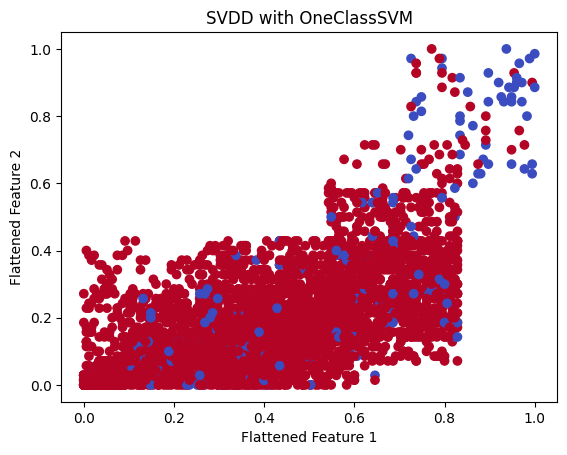

In [ ]:
from sklearn.svm import OneClassSVM
import numpy as np
import matplotlib.pyplot as plt


#gamma=kernel spread,nu=anomaly tolerance
svdd = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.05)  # RBF kernel = SVDD

# Reshape X_train to be 2D for OneClassSVM
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)

svdd.fit(X_train_reshaped)

y_pred = svdd.predict(X_train_reshaped)  # +1 for inliers, -1 for outliers

plt.scatter(X_train_reshaped[:, 0], X_train_reshaped[:, 1], c=y_pred, cmap='coolwarm')
plt.title("SVDD with OneClassSVM")
plt.xlabel("Flattened Feature 1")
plt.ylabel("Flattened Feature 2")
plt.show()

In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# import numpy as np

# input = keras.Input(shape=(15, 4))
# x = layers.Flatten()(input)
# encoding_dim = 32  #  latent space (bottleneck)
# sparsity_regularizer_strength = 0.1  #sparsity penalty
# encoded = layers.Dense(encoding_dim, activation='relu',
#                        activity_regularizer=keras.regularizers.l2(sparsity_regularizer_strength))(x)
# decoded = layers.Dense(60, activation='sigmoid')(encoded)
# output = layers.Reshape((15, 4))(decoded)  # Reshape back to original

# autoencoder = keras.Model(inputs=input, outputs=output)
# autoencoder.compile(optimizer='adam', loss='mse')
# history=autoencoder.fit(X_train, X_train, epochs=50, validation_split=0.15)

In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# import numpy as np
# sparsity_level = 0.05       # e.g., target average activation
# lambda_sparse = 0.001       # weight for KL divergence

# def sparse_loss(y_true, y_pred):
#     mse_loss = tf.reduce_mean(keras.losses.MeanSquaredError()(y_true, y_pred))
#     hidden_layer_output = encoder(y_pred)
#     mean_activation = tf.reduce_mean(hidden_layer_output, axis=0)

#     kl_divergence = tf.reduce_sum(sparsity_level * tf.math.log(sparsity_level / (mean_activation + 1e-10)) +
#                                   (1 - sparsity_level) * tf.math.log((1 - sparsity_level) / (1 - mean_activation + 1e-10)))

#     return mse_loss + lambda_sparse * kl_divergence

# input = keras.Input(shape=(15, 4))
# x = layers.Flatten()(input)
# encoding_dim = 32  #  latent space (bottleneck)
# sparsity_regularizer_strength = 0.1  #sparsity penalty
# encoded = layers.Dense(encoding_dim, activation='relu')(x)
# decoded = layers.Dense(60, activation='sigmoid')(encoded)
# output = layers.Reshape((15, 4))(decoded)  # Reshape back to original

# autoencoder = keras.Model(inputs=input, outputs=output)
# encoder = keras.Model(inputs=input, outputs=encoded)
# autoencoder.compile(optimizer='adam', loss=sparse_loss)
# history=autoencoder.fit(X_train, X_train, epochs=50, validation_split=0.15)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from keras import regularizers

#SAE
sparsity_level = 0.05       # e.g., target average activation
lambda_sparse = 0.001       # weight for KL divergence
encoding_dim = 32  #  latent space (bottleneck)
# encoder
input = keras.Input(shape=(15, 4))
x = layers.Flatten()(input)

encoded = layers.Dense(encoding_dim, activation='relu',kernel_regularizer=regularizers.l1(0.1))(x)
encoder = keras.Model(inputs=input, outputs=encoded)

# decoder
encoded_input = keras.Input(shape=(encoding_dim,))
decoded = layers.Dense(60, activation='sigmoid')(encoded_input)
reshaped_output = layers.Reshape((15, 4))(decoded)
decoder = keras.Model(inputs=encoded_input, outputs=reshaped_output)

# Autoencoder: encoder + decoder
autoencoder_input = keras.Input(shape=(15, 4))
encoded_output = encoder(autoencoder_input)
decoded_output = decoder(encoded_output)
autoencoder = keras.Model(inputs=autoencoder_input, outputs=decoded_output)

def sparse_loss(y_true, y_pred):
    mse_loss = tf.reduce_mean(keras.losses.MeanSquaredError()(y_true, y_pred))
    hidden = encoder(y_true)
    mean_activation = tf.reduce_mean(hidden, axis=0)
    mean_activation = tf.clip_by_value(mean_activation, 1e-6, 1 - 1e-6) #clip_by_function to avoid log(0)
    kl_div = tf.reduce_sum(
        sparsity_level * tf.math.log(sparsity_level / mean_activation) +
        (1 - sparsity_level) * tf.math.log((1 - sparsity_level) / (1 - mean_activation))
    )
    return mse_loss + lambda_sparse * kl_div



In [ ]:
history=autoencoder.compile(optimizer='adam', loss=sparse_loss)
history=autoencoder.fit(X_train, X_train, epochs=50, validation_split=0.15)

Epoch 1/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.9568 - val_loss: 0.8129
Epoch 2/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5570 - val_loss: 0.1548
Epoch 3/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1064 - val_loss: 0.0588
Epoch 4/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0440 - val_loss: 0.0457
Epoch 5/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0367 - val_loss: 0.0426
Epoch 6/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0340 - val_loss: 0.0404
Epoch 7/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0321 - val_loss: 0.0394
Epoch 8/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0310 - val_loss: 0.0378
Epoch 9/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0303 - val_loss: 0.0371
Epoch 10/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0295 - val_loss: 0.0363
Epoch 11/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0289 - val_loss: 0.0358
Epoch 12/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

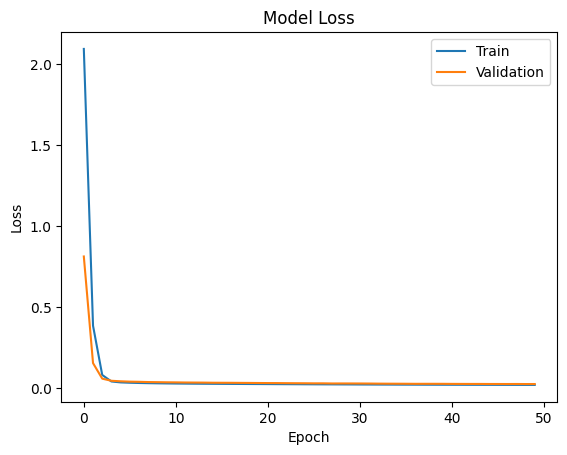

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


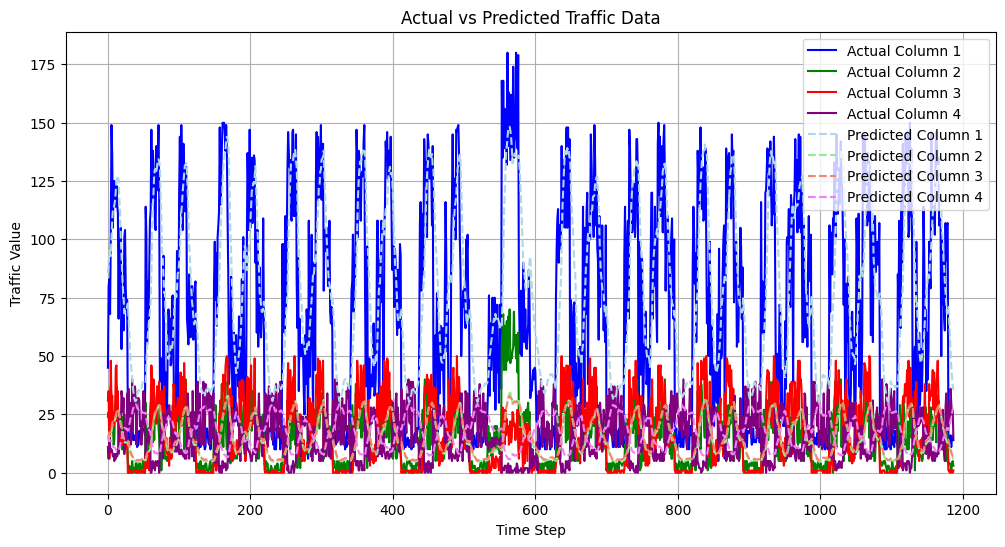

In [ ]:
import matplotlib.pyplot as plt

y_pred = autoencoder.predict(X_test)

# Inverse transform the scaled data back to original scale
y_test_actual = scalar.inverse_transform(y_test)
y_pred_actual = scalar.inverse_transform(y_pred[:, -1, :]) # Select the last time step


# Plotting
plt.figure(figsize=(12, 6))

# Plot actual data for each column
plt.plot(y_test_actual[:, 0], label='Actual Column 1',color='blue')
plt.plot(y_test_actual[:, 1], label='Actual Column 2',color='green')
plt.plot(y_test_actual[:, 2], label='Actual Column 3', color='red')
plt.plot(y_test_actual[:, 3], label='Actual Column 4', color='purple')

# Plot predicted data for each column
plt.plot(y_pred_actual[:, 0], label='Predicted Column 1', linestyle='--', color='lightblue')
plt.plot(y_pred_actual[:, 1], label='Predicted Column 2', linestyle='--', color='lightgreen')
plt.plot(y_pred_actual[:, 2], label='Predicted Column 3', linestyle='--', color='salmon')
plt.plot(y_pred_actual[:, 3], label='Predicted Column 4', linestyle='--', color='violet')


plt.title('Actual vs Predicted Traffic Data')
plt.xlabel('Time Step')
plt.ylabel('Traffic Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:


# import matplotlib.pyplot as plt

# y_pred = autoencoder.predict(X_test)

# feature_names = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']

# for i in range(y_test.shape[1]): # Iterate through each feature
#     plt.figure(figsize=(12, 6))
#     plt.plot(y_test[:, i], label=f'Actual {feature_names[i]}')
#     # We are plotting the predicted value for the next time step (the last step in the reconstructed sequence)
#     plt.plot(y_pred[:, -1, i], label=f'Predicted {feature_names[i]}')
#     plt.title(f'Actual vs Predicted for {feature_names[i]}')
#     plt.xlabel('Time Instance')
#     plt.ylabel('Scaled Count')
#     plt.legend()
#     plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
y_pred=autoencoder.predict(X_test)
test_predict=autoencoder.predict(X_test)
print(test_predict.shape)
predictions_original_scale = scalar.inverse_transform(test_predict[:, -1, :])
y_test_original_scale = scalar.inverse_transform(y_test)
mae=mean_absolute_error(predictions_original_scale,y_test_original_scale,)
mse=np.sqrt(mean_squared_error(predictions_original_scale,y_test_original_scale,))
mape=mean_absolute_percentage_error(predictions_original_scale,y_test_original_scale,)
rmse=np.sqrt(mse)
print(rmse)
print(mse)
print(mae)
print(mape)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(1188, 15, 4)
4.2352843456133265
17.937633488197307
12.013377540741706
0.5067457913291241


In [ ]:
# def create_model():
#   from keras.layers import Dense,LSTM,Dropout
#   from tensorflow.keras.models import Model
#   from keras.models import Sequential
#   from keras import regularizers
#   model = Sequential()
#   model.add(LSTM(50,input_shape=(15,4)))
#   model.add(Dense(4, kernel_regularizer=regularizers.l2(0.1)))

#   model.compile(loss='mae',optimizer='adam')
#   return model

# model = create_model()
# print(model.summary())

In [ ]:
# history=model.fit(X_train,y_train,epochs=50,validation_split=0.15,verbose=1)

In [ ]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper right')